##### Agenda
    Refresh your memory on how to do linear regression in scikit-learn
    Attempt to use linear regression for classification
    Show you why logistic regression is a better alternative for classification
    Brief overview of probability, odds, e, log, and log-odds
    Explain the form of logistic regression
    Explain how to interpret logistic regression coefficients
    Demonstrate how logistic regression works with categorical features
    Compare logistic regression with other models

###### Part 1: predicting a continous response

In [4]:
# glass identification dataset

import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names =['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names = col_names, index_col = 'id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


#####

    Question: Pretend that we want to predict ri, and our only feature is al. How could we do it using machine learning?

    Answer: We could frame it as a regression problem, and use a linear regression model with al as the only feature and ri as       the response.

    Question: How would we visualize this model?

    Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

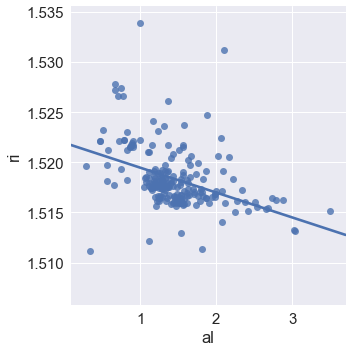

In [6]:
sns.lmplot(x='al', y ='ri', data=glass, ci=None)

##### Question: How would we draw this plot without using Seaborn?

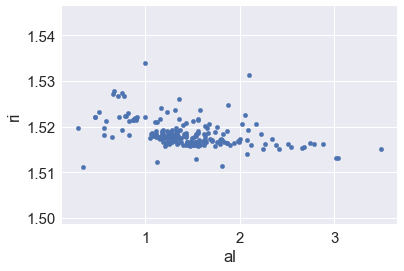

In [8]:
# scatter plot using pandas

glass.plot(kind='scatter', x='al', y= 'ri')

Text(0,0.5,'ri')

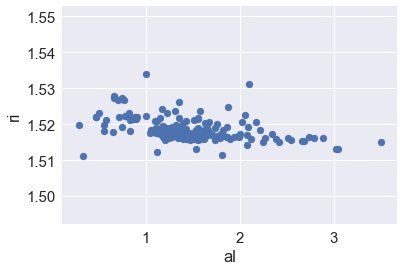

In [11]:
# equivalent scatter plot using matplotlib

plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [16]:
# fit a linear regression model

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass['ri']
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0,0.5,'ri_pred')

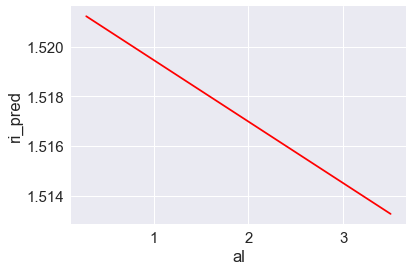

In [18]:
# plot those predictions connected by a line

plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri_pred')

Text(0,0.5,'ri')

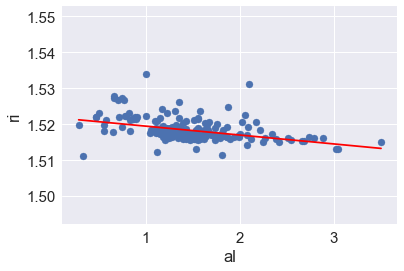

In [19]:
# put the plots together

plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

Refresher: interpreting linear regression coefficients

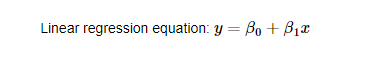

In [101]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\linear regression equation.png'
      ,width="600")

In [22]:
# compute prediction for al=2 using the equation
linreg.intercept_+linreg.coef_*2

array([1.51699012])

In [28]:
# compute the prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [33]:
# examine coefficient for al
feature_cols,linreg.coef_

(['al'], array([-0.00247761]))

Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [35]:
# compute prediction for al=3 using the equation
linreg.intercept_+linreg.coef_*3

array([1.51451251])

In [36]:
# compute the prediction for al=3 using the predict method
linreg.predict(3)

array([1.51451251])

###### Part 2: predicting a categorical response

In [38]:
# examine glass type

glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [39]:
# types 1,2 and 3 are window glass
# types 5,6 and 7 are household glass
glass['household']= glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting household using al. Let's visualize the relationship to figure out how to do this:

Text(0,0.5,'household')

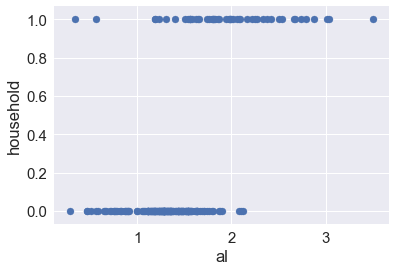

In [40]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [48]:
# fit a linear regression model and store the prediction

feature_cols=['al']
X = glass[feature_cols]
y= glass['household']
linreg.fit(X,y)
glass['household_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236


Text(0,0.5,'houshold')

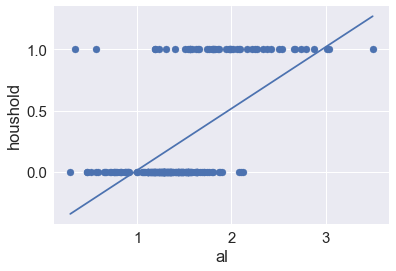

In [44]:
# Scatter plot that includes a regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred)
plt.xlabel('al')
plt.ylabel('houshold')

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

In [45]:
# understanding np.where
import numpy as np
nums =np.array([5,15,8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums>10, 'big', 'small')


array(['small', 'big', 'small'], dtype='<U5')

In [52]:
# transform household_pred to 1 or 0

glass['household_pred_class'] = np.where(glass.household>=0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0,0.5,'household')

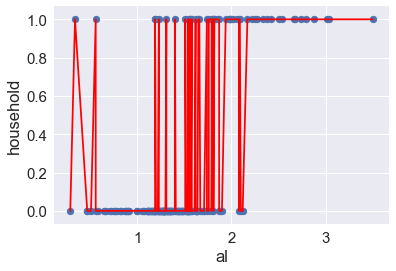

In [59]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al,glass.household_pred_class, color ='red')
plt.xlabel('al')
plt.ylabel('household')

###### Part 3: Using logistic regression instead

In [56]:
# fit a logistic regression model and store the predictions
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
feature_cols=['al']
X=glass[feature_cols]
y=glass['household']
logreg.fit(X,y)
glass['household_pred_class_log']=logreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_class_log
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,1,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0


Text(0,0.5,'household')

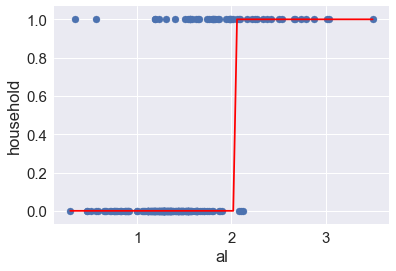

In [58]:
# plot the class prediction
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class_log, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

In [63]:
# store the predicted probability of class 1
glass['household_pred_prob']= logreg.predict_proba(X)[:,1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_class_log,household_pred_prob
id,,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0,0.028066
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,1,0,0.030943
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0,0.039820
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0,0.039820
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0,0.043012


Text(0,0.5,'household')

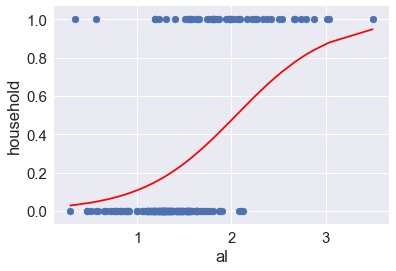

In [65]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color ='red')
plt.xlabel('al')
plt.ylabel('household')


In [67]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

##### Part 4: Probability, odds, e, log, log-odds

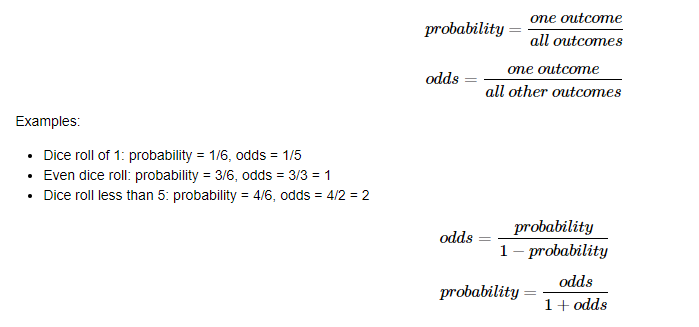

In [72]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\probability and odds.png'
      ,width="555")

In [75]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1,0.2,0.25,0.5,0.6,0.8,0.9]})
table['odds']=table.probability/(1-table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is e? It is the base rate of growth shared by all continually growing processes:

In [76]:
# exponential function e^1
np.exp(1)

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [77]:
#time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

In [78]:
# It is also the inverse of the exponential function:
np.log(np.exp(5))

5.0

In [80]:
#add log-odds to the table
table['logodds']=np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


##### Part 5: What is Logistic Regression?

Linear regression: continuous response is modeled as a linear combination of the features:

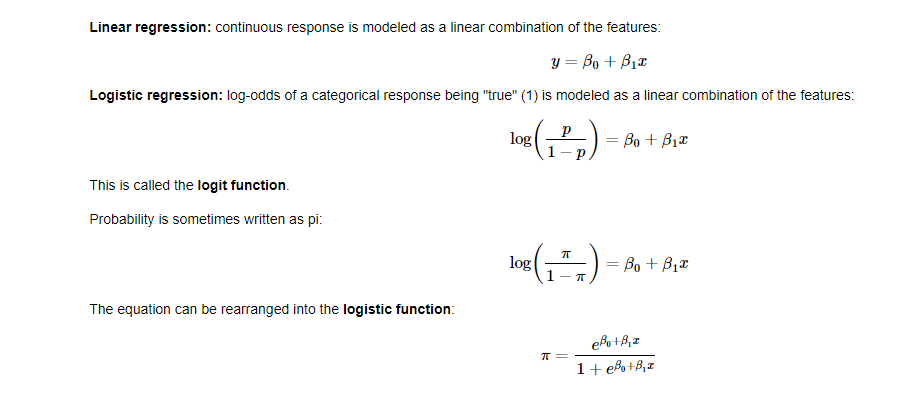

In [88]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\linear_logistic_equation.png'
      ,width="700")

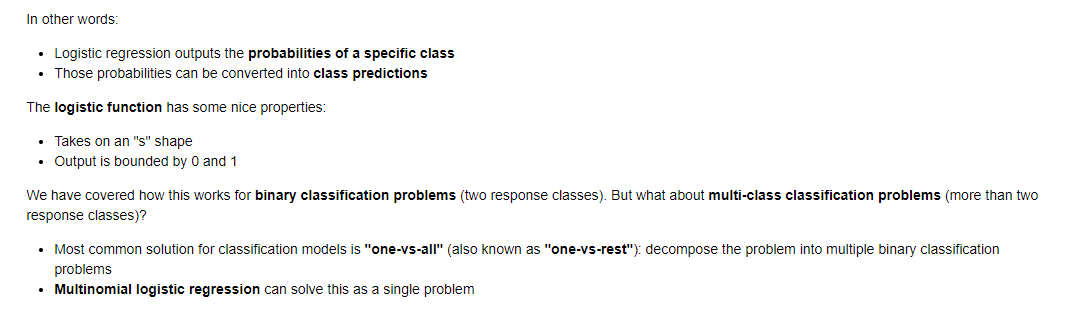

In [90]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\logistic_regression_basic_details.png'
      ,width="1000")

##### Part 6: Interpreting Logistic Regression Coefficients

Text(0,0.5,'household')

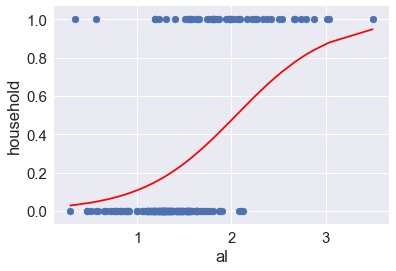

In [91]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [93]:
# compute predicted log-odds for al=2 using the equation
logodds=logreg.intercept_+logreg.coef_[0]*2
logodds

array([-0.10592543])

In [94]:
# convert log-odds to odds
odds = np.exp(logodds)
odds


array([0.89949172])

In [95]:
# convert odds into probabilities
probs = odds/(1+odds)
probs

array([0.47354338])

In [97]:
# compute predicted probability for al=2 using the predic_proba method
logreg.predict_proba(2)[:,1]

array([0.47354338])

In [98]:
# examine the coefficient for al
feature_cols,logreg.coef_[0]

(['al'], array([2.01099096]))

Bottom line: Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [99]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

Interpretation: For an 'al' value of 0, the log-odds of 'household' is -4.12

In [100]:
# convert log odds to probability
logodds = logreg.intercept_
odds=np.exp(logodds)
prob= odds/(1+odds)
prob

array([0.01586095])

http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb